In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
df = pd.read_csv("cancer_data.csv")

In [3]:
df.head()

,age,gender,bmi,smoking,genetic_risk,physical_activity,alcohol_intake,cancer_history,diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040295,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1500 non-null   int64  
 1   gender             1500 non-null   int64  
 2   bmi                1500 non-null   float64
 3   smoking            1500 non-null   int64  
 4   genetic_risk       1500 non-null   int64  
 5   physical_activity  1500 non-null   float64
 6   alcohol_intake     1500 non-null   float64
 7   cancer_history     1500 non-null   int64  
 8   diagnosis          1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [5]:
df.describe()

,age,gender,bmi,smoking,genetic_risk,physical_activity,alcohol_intake,cancer_history,diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [6]:
print(df.isnull().sum())

age                  0
gender               0
bmi                  0
smoking              0
genetic_risk         0
physical_activity    0
alcohol_intake       0
cancer_history       0
diagnosis            0
dtype: int64


In [7]:
cat_cols = ["gender", "smoking", "cancer_history", "diagnosis"]

In [8]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,age,gender,bmi,smoking,genetic_risk,physical_activity,alcohol_intake,cancer_history,diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040295,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


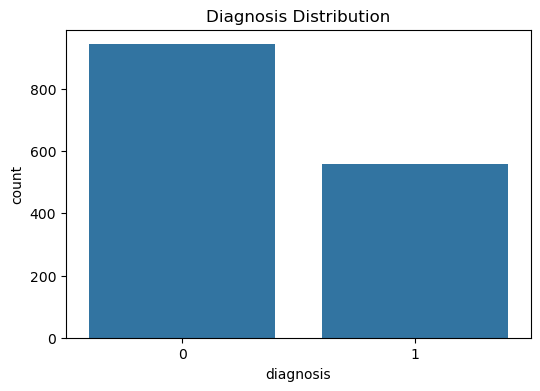

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="diagnosis", data=df)
plt.title("Diagnosis Distribution")
plt.show()

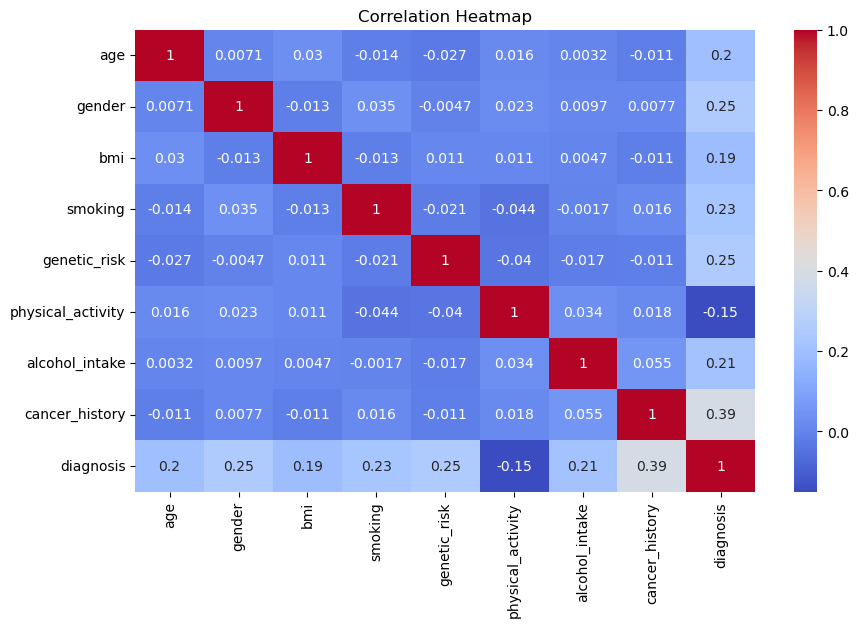

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.91
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       189
           1       0.92      0.83      0.87       111

    accuracy                           0.91       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.91      0.91       300

[[181   8]
 [ 19  92]]


In [17]:
joblib.dump(knn, "cancer_knn.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']